## Language model and sentiment analysis
**This week I try to follow prof. Jeremy to create a language model and then use it as a base to train our sentiment analysis model.**
**P.S: As I was building this model using colab after about 4-5 hours my VM reached out of memory and the language model training was left in between. Still we managed to make quite a decent model with quite low delta between training and validation sets. THIS NOTEBOOK IS INCOMPLETE**

In [3]:
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision


     \ 90.6MB 61.3MB/s
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-7aph782_/wheels/64/3d/9f/d12a217aa2531321c5b9ae96288fcae2687d3b744376e8f94f
Successfully built fastai


Hit:1 http://archive.ubuntu.com/ubuntu artful InRelease
Hit:2 http://security.ubuntu.com/ubuntu artful-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
All packages are up to date.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [4]:
! pip install torchtext

In [5]:
! pip install spacy

    100% |████████████████████████████████| 22.0MB 1.7MB/s 
    100% |████████████████████████████████| 122kB 18.5MB/s 
    100% |████████████████████████████████| 1.2MB 14.2MB/s 
    100% |████████████████████████████████| 194kB 21.0MB/s 
    100% |████████████████████████████████| 153kB 18.2MB/s 
    100% |████████████████████████████████| 604kB 17.2MB/s 
    100% |████████████████████████████████| 317kB 16.6MB/s 
    100% |████████████████████████████████| 450kB 18.9MB/s 
  Running setup.py bdist_wheel for spacy ... done
  Stored in directory: /content/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Running setup.py bdist_wheel for murmurhash ... done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *

import torchtext
from torchtext import vocab, data
from torchtext.datasets import language_modeling

from fastai.rnn_reg import *
from fastai.rnn_train import *
from fastai.nlp import *
from fastai.lm_rnn import *

import dill as pickle
import spacy

**Get data**

In [7]:
! mkdir data && wget http://files.fast.ai/data/aclImdb.tgz !tar -xvzf aclImdb.tgz -d data/


wget: invalid option -- 'z'
wget: invalid option -- 'f'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [8]:
! mkdir data && wget http://files.fast.ai/data/aclImdb.tgz && !tar -xvzf aclImdb.tgz -d data/


mkdir: cannot create directory ‘data’: File exists


In [9]:
! mkdir datanew && wget http://files.fast.ai/data/aclImdb.tgz !tar -xvzf aclImdb.tgz -d data/


wget: invalid option -- 'z'
wget: invalid option -- 'f'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [12]:
! mkdir dataset && wget http://files.fast.ai/data/aclImdb.tgz && !tar -xvzf aclImdb.tgz -d dataset/


--2018-07-25 00:59:27--  http://files.fast.ai/data/aclImdb.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145982645 (139M) [text/plain]
Saving to: ‘aclImdb.tgz’

aclImdb.tgz         100%[===================>] 139.22M   106MB/s    in 1.3s    

2018-07-25 00:59:28 (106 MB/s) - ‘aclImdb.tgz’ saved [145982645/145982645]

/bin/sh: 1: !tar: not found


In [13]:
!tar -xvzf /datset/aclImdb.tgz -d dataset/


tar: You may not specify more than one '-Acdtrux', '--delete' or  '--test-label' option
Try 'tar --help' or 'tar --usage' for more information.


In [14]:
!tar -xvzf /dataset/aclImdb.tgz


tar (child): /dataset/aclImdb.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [15]:
! ls

aclImdb.tgz	     dataset			     updatestatus.3
clouderizer	     datasets			     updatestatus.4
clouderizer_init.sh  install_clouderizer_service.sh  updatestatus.5
clouderizer.jar      temp.sh			     updatestatus.6
clouderizer.service  updatestatus		     updatestatus.7
colab_init.sh	     updatestatus.1		     updatestatus.8
data		     updatestatus.10		     updatestatus.9
datalab		     updatestatus.11
datanew		     updatestatus.2


In [16]:
!tar -xvzf aclImdb.tgz -d dataset/


tar: You may not specify more than one '-Acdtrux', '--delete' or  '--test-label' option
Try 'tar --help' or 'tar --usage' for more information.


In [0]:
!tar -xvzf aclImdb.tgz


In [18]:
ls

aclImdb/             datanew/                        updatestatus.2
aclImdb.tgz          dataset/                        updatestatus.3
clouderizer/         datasets/                       updatestatus.4
clouderizer_init.sh  install_clouderizer_service.sh  updatestatus.5
clouderizer.jar      temp.sh                         updatestatus.6
clouderizer.service  updatestatus                    updatestatus.7
colab_init.sh        updatestatus.1                  updatestatus.8
data/                updatestatus.10                 updatestatus.9
datalab/             updatestatus.11


In [20]:
! ls aclImdb/train

all		 neg  unsup	     urls_neg.txt  urls_unsup.txt
labeledBow.feat  pos  unsupBow.feat  urls_pos.txt


In [21]:
PATH='./aclImdb/'

TRN_PATH = 'train/all/'
VAL_PATH = 'test/all/'
TRN = f'{PATH}{TRN_PATH}'
VAL = f'{PATH}{VAL_PATH}'

%ls {PATH}

imdbEr.txt  imdb.vocab  README  test/  train/


In [24]:
!find {TRN} -name '*.txt' | xargs cat | wc -w
!find {VAL} -name '*.txt' | xargs cat | wc -w


17486581
5686719


**Lets Tockenize the data, i.e convert the data into an array of words/tockens. We'll use spacy to tockenize the data**

In [0]:
spacy_tok = spacy.load('en')


In [0]:
TEXT= data.Field(lower=True, tokenize='spacy')

In [0]:
bs=64; bptt=70


In [0]:
FILES=dict(train=TRN_PATH,validation=VAL_PATH,test=VAL_PATH)

**Building a data model object**

In [0]:
md=LanguageModelData.from_text_files(PATH,TEXT,**FILES,bs=bs,bptt=bptt,min_freq=10)

In [0]:
pickle.dump(TEXT, open(f'{PATH}/TEXT.pkl','wb'))


In [51]:
len(md.trn_dl) #batches

4583

In [52]:
len(TEXT.vocab) # =no. of tockens/words

37392

In [62]:
TEXT.vocab.itos[:15]

['<unk>',
 '<pad>',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that']

In [81]:
TEXT.vocab.stoi['what']

60

In [79]:
md.trn_ds[0].text[37358:37360]

['what', 'this']

In [80]:
TEXT.numericalize([md.trn_ds[0].text[37358:37360]])

Variable containing:
 60
 13
[torch.cuda.LongTensor of size 2x1 (GPU 0)]

In [87]:
next(iter(md.trn_dl))

(Variable containing:
     13      3      6  ...      39    341     10
      9     24    410  ...      32   2732      2
      2    113      3  ...    1092      2     23
         ...            ⋱           ...         
    397     50    264  ...       5    105    124
      4    941      3  ...    3096    318     11
     12     69     12  ...       4     63     31
 [torch.cuda.LongTensor of size 71x64 (GPU 0)], Variable containing:
      9
     24
    410
   ⋮   
      2
  20031
      2
 [torch.cuda.LongTensor of size 4544 (GPU 0)])

In [0]:
em_sz = 200  # size of each embedding vector
nh = 500     # number of hidden activations per layer
nl = 3       # number of layers

In [0]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))


In [0]:
learner=md.get_model(opt_fn,em_sz,nh,nl,dropouti=0.05, dropout=0.05, wdrop=0.1, dropoute=0.02, dropouth=0.05)
learner.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learner.clip=0.3


**Let's find the learning rate**

In [93]:
learner.lr_find()

 78%|███████▊  | 3574/4583 [16:57<04:47,  3.51it/s, loss=20.8]

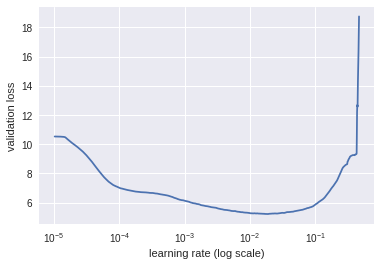

In [94]:
learner.sched.plot()

**Finally we can train our model**

In [95]:
learner.fit(3e-3,4,cycle_len=1,cycle_mult=2,wds=1e-6)

epoch      trn_loss   val_loss   
    0      5.008197   4.903154  
 17%|█▋        | 782/4583 [03:41<17:55,  3.53it/s, loss=4.99]    1      4.720652   4.599742  
    2      4.614315   4.513558  
    3      4.633103   4.515658  
    4      4.543493   4.436014  
    5      4.481192   4.381148  
 34%|███▍      | 1580/4583 [07:30<14:16,  3.51it/s, loss=4.48]Buffered data was truncated after reaching the output size limit.

In [99]:
learner

SequentialRNN(
  (0): RNN_Encoder(
    (encoder): Embedding(37392, 200, padding_idx=1)
    (encoder_with_dropout): EmbeddingDropout(
      (embed): Embedding(37392, 200, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDrop(
        (module): LSTM(200, 500)
      )
      (1): WeightDrop(
        (module): LSTM(500, 500)
      )
      (2): WeightDrop(
        (module): LSTM(500, 200)
      )
    )
    (dropouti): LockedDropout(
    )
    (dropouths): ModuleList(
      (0): LockedDropout(
      )
      (1): LockedDropout(
      )
      (2): LockedDropout(
      )
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=200, out_features=37392)
    (dropout): LockedDropout(
    )
  )
)

In [114]:
'accuracy.= ',math.exp( 4.599742)

('accuracy.= ', 99.45865199925045)